## **Load Data**

In [159]:
#import necessary model
!pip install emoji
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# read json files and convert it into dataframe
fentybeauty_df = pd.read_json('fentybeauty.json')
fentybeauty_df2 = pd.read_json('fentybeauty2.json')
fentybeauty_df3 = pd.read_json('fentybeauty3.json')

print("fentybeauty_df shape:", fentybeauty_df.shape)
print("fentybeauty_df2 shape:", fentybeauty_df2.shape)
print("fentybeauty_df3 shape:", fentybeauty_df3.shape)

fentybeauty_df shape: (2043, 43)
fentybeauty_df2 shape: (54, 43)
fentybeauty_df3 shape: (39, 43)


In [160]:
#Merge three dataframe
FB_df = pd.concat([fentybeauty_df, fentybeauty_df2,fentybeauty_df3], axis=0)

#reset index
FB_df = FB_df.reset_index(drop=True)

FB_df

,UserNickname,Rating,ReviewText,ContextDataValues,ProductId,UserEmailAddress,Videos,CommentIds,Photos,TotalNegativeFeedbackCount,...,Cons,TagDimensions,SecondaryRatings,Badges,SubmissionId,IsSyndicated,IsRecommended,LastModeratedTime,Id,ContentLocale
0,That1Girl87,4,"I have combination skin, so I like that this p...","{'skinType': {'Value': 'combination', 'Id': 's...",P04897543,NaN,[],[],[],0,...,NaN,{},{},{},r18723api-_16553026Iy8pu7vdYI,False,True,2022-06-15T14:45:41.000+00:00,210978339,en_US
1,LilacDinosaur,5,I have oily skin and large pores and since I b...,"{'skinType': {'Value': 'combination', 'Id': 's...",P04897543,NaN,[],[],[],0,...,NaN,{},{},{},r18723api-_16546399pq387Pbjwz,False,True,2022-06-07T22:45:40.000+00:00,210490595,en_US
2,sofiacyrus,1,I use this before applying fenty foundation It...,"{'skinType': {'Value': 'combination', 'Id': 's...",P04897543,NaN,[],[],[],4,...,NaN,{},{},{},r18723api-_16492460Kh2WjOQO9v,False,False,2022-04-06T20:00:35.000+00:00,205769577,en_US
3,EJW92,1,Worst primer I have ever used. I have oily ski...,"{'skinType': {'Value': 'combination', 'Id': 's...",P04897543,NaN,[],[],[],7,...,NaN,{},{},{},r18723api-_16478877uKuFPmsiuv,False,False,2022-03-21T19:30:38.000+00:00,204511915,en_US
4,emleekitten,5,Just switched from a low end primer to this an...,"{'skinType': {'Value': 'oily', 'Id': 'skinType...",P04897543,NaN,[],[],[],0,...,NaN,{},{},{},r18723api-_164733458VhwfXQOez,False,True,2022-03-15T09:15:20.000+00:00,204097698,en_US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,Calyps,1,Personally it doesn’t keep my skin from being ...,"{'skinType': {'Value': 'combination', 'Id': 's...",P463038,NaN,[],[],[],0,...,NaN,{},{},{'StaffContextBadge': {'ContentType': 'REVIEW'...,r18723api-_16080157a8MUOAAMoj,False,False,2020-12-18T02:30:23.000+00:00,168509303,fr_CA
2132,Naisia,5,I have really oily skin and was looking for a ...,"{'skinType': {'Value': 'oily', 'Id': 'skinType...",P463038,NaN,[],[],[],0,...,NaN,{},{},{},r18723api-_16053980gLvuo4YkGo,False,True,2020-11-15T00:15:07.000+00:00,165623261,en_US
2133,katersz,1,Did not mattify me at all! I was oily just a c...,"{'skinType': {'Value': 'combination', 'Id': 's...",P463038,NaN,[],[],[],4,...,NaN,{},{},{},r18723api-_16053670SwngU28Tm3,False,False,2020-11-15T23:00:13.000+00:00,165608632,en_CA
2134,Aibbi,5,Amazing. First time buyer and I will buy again...,"{'skinType': {'Value': 'dry', 'Id': 'skinType'...",P463038,NaN,[],[],[],2,...,NaN,{},{},{},r18723api-_1603926990k5jNHQ9d,False,True,2020-10-28T23:45:09.000+00:00,164639294,en_US


In [161]:
#view hidden colums
columns = FB_df.columns
print(columns)

Index(['UserNickname', 'Rating', 'ReviewText', 'ContextDataValues',
       'ProductId', 'UserEmailAddress', 'Videos', 'CommentIds', 'Photos',
       'TotalNegativeFeedbackCount', 'RatingRange', 'CampaignId',
       'UserLocation', 'SecondaryRatingsOrder', 'TotalCommentCount',
       'ContextDataValuesOrder', 'ClientResponses', 'TagDimensionsOrder',
       'TotalPositiveFeedbackCount', 'IsRatingsOnly', 'LastModificationTime',
       'Pros', 'ProductRecommendationIds', 'BadgesOrder', 'AuthorId',
       'Helpfulness', 'SubmissionTime', 'AdditionalFields',
       'AdditionalFieldsOrder', 'TotalFeedbackCount', 'Title',
       'ModerationStatus', 'IsFeatured', 'Cons', 'TagDimensions',
       'SecondaryRatings', 'Badges', 'SubmissionId', 'IsSyndicated',
       'IsRecommended', 'LastModeratedTime', 'Id', 'ContentLocale'],
      dtype='object')


In [162]:
#convert SubmissionTime column to datetime type
FB_df['SubmissionTime'] = pd.to_datetime(FB_df['SubmissionTime'])

In [163]:
#keep necessary colums
FB_df = FB_df[['UserNickname', 'Rating', 'ReviewText','SubmissionTime']]

FB_df.head()

,UserNickname,Rating,ReviewText,SubmissionTime
0,That1Girl87,4,"I have combination skin, so I like that this p...",2022-06-15 14:18:15+00:00
1,LilacDinosaur,5,I have oily skin and large pores and since I b...,2022-06-07 22:12:35+00:00
2,sofiacyrus,1,I use this before applying fenty foundation It...,2022-04-06 11:53:39+00:00
3,EJW92,1,Worst primer I have ever used. I have oily ski...,2022-03-21 18:36:05+00:00
4,emleekitten,5,Just switched from a low end primer to this an...,2022-03-15 08:56:14+00:00


In [164]:
#View the start and end times of the dataset
print ('The begining date of the dataset is %s'%(str(min(FB_df['SubmissionTime']))))
print ('The ending date of the dataset is %s'%(str(max(FB_df['SubmissionTime']))))

The begining date of the dataset is 2017-09-08 18:15:32+00:00
The ending date of the dataset is 2022-06-15 14:18:15+00:00


## **Data Cleaning**

In [165]:
#clean missing data in 'ReviewText' column
FB_df = FB_df.dropna(subset=['ReviewText'])

FB_df['ReviewText'].isnull().sum()

0

In [166]:
# Remove numbers
def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

# Remove punctuations
def remove_punctuations(text):
    return re.sub(r"[~.,%/:;?_&+*=!-#]", " ", text)

# Remove URLs
def remove_URLs(text):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', ' ', text)

# Convert emojis to text
def convert_emojis(text):
    return emoji.demojize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['primer', 'skin', 'product', 'fenty'])

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in stop_words])

# Combine all functions
cleaning_functions = [str.lower, remove_numbers, remove_punctuations, remove_URLs, convert_emojis, remove_stopwords]

# Apply all cleaning functions to the dataset
def clean_text(text, cleaning_functions):
    for func in cleaning_functions:
        text = func(text)
    return text

FB_df['ReviewText'] = FB_df['ReviewText'].apply(lambda x: clean_text(x, cleaning_functions))

FB_df

<>:11: DeprecationWarning: invalid escape sequence '\.'
<>:11: DeprecationWarning: invalid escape sequence '\.'
/var/folders/gv/kb2cpml97nv7vm99fb31ljvc0000gn/T/ipykernel_30476/1226607398.py:11: DeprecationWarning: invalid escape sequence '\.'
  return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', ' ', text)


,UserNickname,Rating,ReviewText,SubmissionTime
0,That1Girl87,4,combination like mattifies t-zone also grips m...,2022-06-15 14:18:15+00:00
1,LilacDinosaur,5,oily large pores since began using foundation ...,2022-06-07 22:12:35+00:00
2,sofiacyrus,1,use applying foundation makes foundation patch...,2022-04-06 11:53:39+00:00
3,EJW92,1,worst ever used oily leaves dry patches never ...,2022-03-21 18:36:05+00:00
4,emleekitten,5,switched low end it’s really big difference i’...,2022-03-15 08:56:14+00:00
...,...,...,...,...
2131,Calyps,1,personally doesn’t keep oily texture soft prob...,2020-12-15 07:01:41+00:00
2132,Naisia,5,really oily looking really good matte decided ...,2020-11-14 23:53:27+00:00
2133,katersz,1,mattify oily couple hours,2020-11-14 15:17:34+00:00
2134,Aibbi,5,amazing first time buyer buy :red_heart::red_h...,2020-10-28 23:15:12+00:00


In [167]:
# Initialize PorterStemmer, which is used for stemming, which is the process of reducing words to their word stem or root form
st = nltk.PorterStemmer() 

# Define a function about stemming
def stemming_on_text(data):
    text = [st.stem(word) for word in data] 
    return data

#apply the stemming function to 'ReviewText'
FB_df['ReviewText']= FB_df['ReviewText'].apply(lambda x: stemming_on_text(x))

In [168]:
# Initialize WordNetLemmatizer, which is used for lemmatization, which is the process of reducing words to their base or root form
lm = nltk.WordNetLemmatizer() 

# Define a function about the WordNetLemmatizer
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

#apply lemmatization function to 'ReviewText'
FB_df['ReviewText'] = FB_df['ReviewText'].apply(lambda x: lemmatizer_on_text(x))

In [169]:
# Print the shape of the data
print(f'The shape of the data is {FB_df.shape}')

The shape of the data is (2134, 4)


In [170]:
#store dataframe
FB_df.to_csv('FB Reviewtext.csv')

## **Descriptive Analysis**

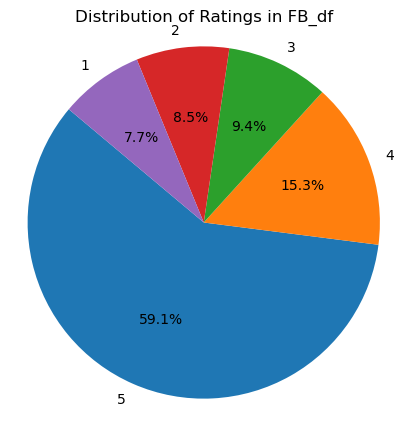

In [171]:
# Count the number of different rating
rating_counts = FB_df['Rating'].value_counts()

# creat a pie chart
plt.figure(figsize=(5, 5)) #set the figure size
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=140) # Format the percentage to have one decimal place
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ratings in FB_df') #set the figure title

plt.show()

In [172]:
# Extract the year
Year = FB_df['SubmissionTime'].dt.year

# Calculate the number of reviews per year
comment_counts_per_year = Year.value_counts().sort_index()

# Print the number of reviews per year
for year, count in comment_counts_per_year.items():
    print(f"Year {year}: {count} comments")

Year 2017: 613 comments
Year 2018: 890 comments
Year 2019: 371 comments
Year 2020: 127 comments
Year 2021: 96 comments
Year 2022: 37 comments


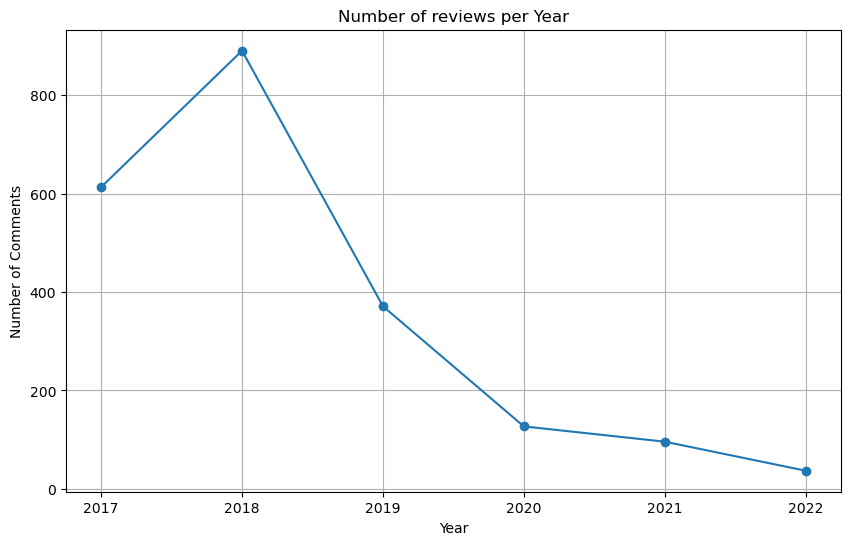

In [173]:
#plot a line chart
plt.figure(figsize=(10, 6))# Set the figure size

plt.plot(comment_counts_per_year.index, comment_counts_per_year.values, marker='o') # Use circular markers

#set the label for the x axis
plt.xlabel('Year')

#set the label for the y axis
plt.ylabel('Number of Comments')

#set the title of the figure
plt.title('Number of reviews per Year')

#display gridlines
plt.grid(True)

#set the x-axis ticks to match the years
plt.xticks(comment_counts_per_year.index)

#display
plt.show()

## **Sentiment Analysis**

In [174]:
nltk.download('vader_lexicon')

#iInitialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

#calculate the sentiment scores for each review
FB_df['scores'] = FB_df['ReviewText'].apply(sia.polarity_scores)

#extract the compound score as the sentiment score
get_value = lambda d: d['compound']
FB_df["sentiment_score"] = FB_df["scores"].apply(get_value)

#define a function to determine the sentiments
def fun(row):
    if row["sentiment_score"] >= 0.1:
        return 'positive'
    elif row["sentiment_score"] <= -0.1:
        return 'negative'
    else:
        return 'neutral'

#apply the function to create the sentiment column
FB_df["sentiment"] = FB_df.apply(fun, axis=1)

#display the results
FB_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/omi5/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,UserNickname,Rating,ReviewText,SubmissionTime,scores,sentiment_score,sentiment
0,That1Girl87,4,combination like mattifies t-zone also grips m...,2022-06-15 14:18:15+00:00,"{'neg': 0.037, 'neu': 0.541, 'pos': 0.422, 'co...",0.9805,positive
1,LilacDinosaur,5,oily large pores since began using foundation ...,2022-06-07 22:12:35+00:00,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.6249,positive
2,sofiacyrus,1,use applying foundation makes foundation patch...,2022-04-06 11:53:39+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,EJW92,1,worst ever used oily leaves dry patches never ...,2022-03-21 18:36:05+00:00,"{'neg': 0.305, 'neu': 0.519, 'pos': 0.176, 'co...",-0.6049,negative
4,emleekitten,5,switched low end it’s really big difference i’...,2022-03-15 08:56:14+00:00,"{'neg': 0.147, 'neu': 0.559, 'pos': 0.294, 'co...",0.4767,positive


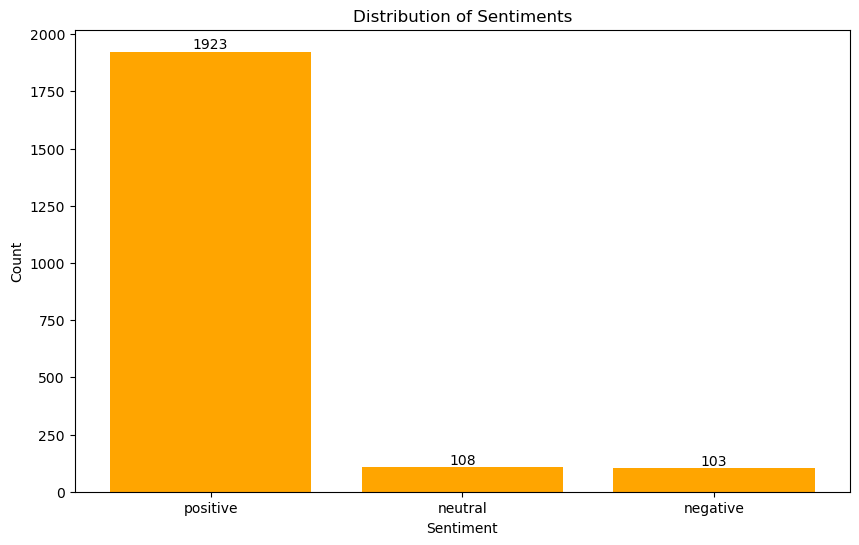

In [175]:
#count the number of different sentiments
sentiment_counts = FB_df['sentiment'].value_counts()

#plot a bar chart
plt.figure(figsize=(10, 6)) #size
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color='orange')

#add numerical labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, yval, ha='center', va='bottom')

#display
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(sentiment_counts.index)
plt.show()

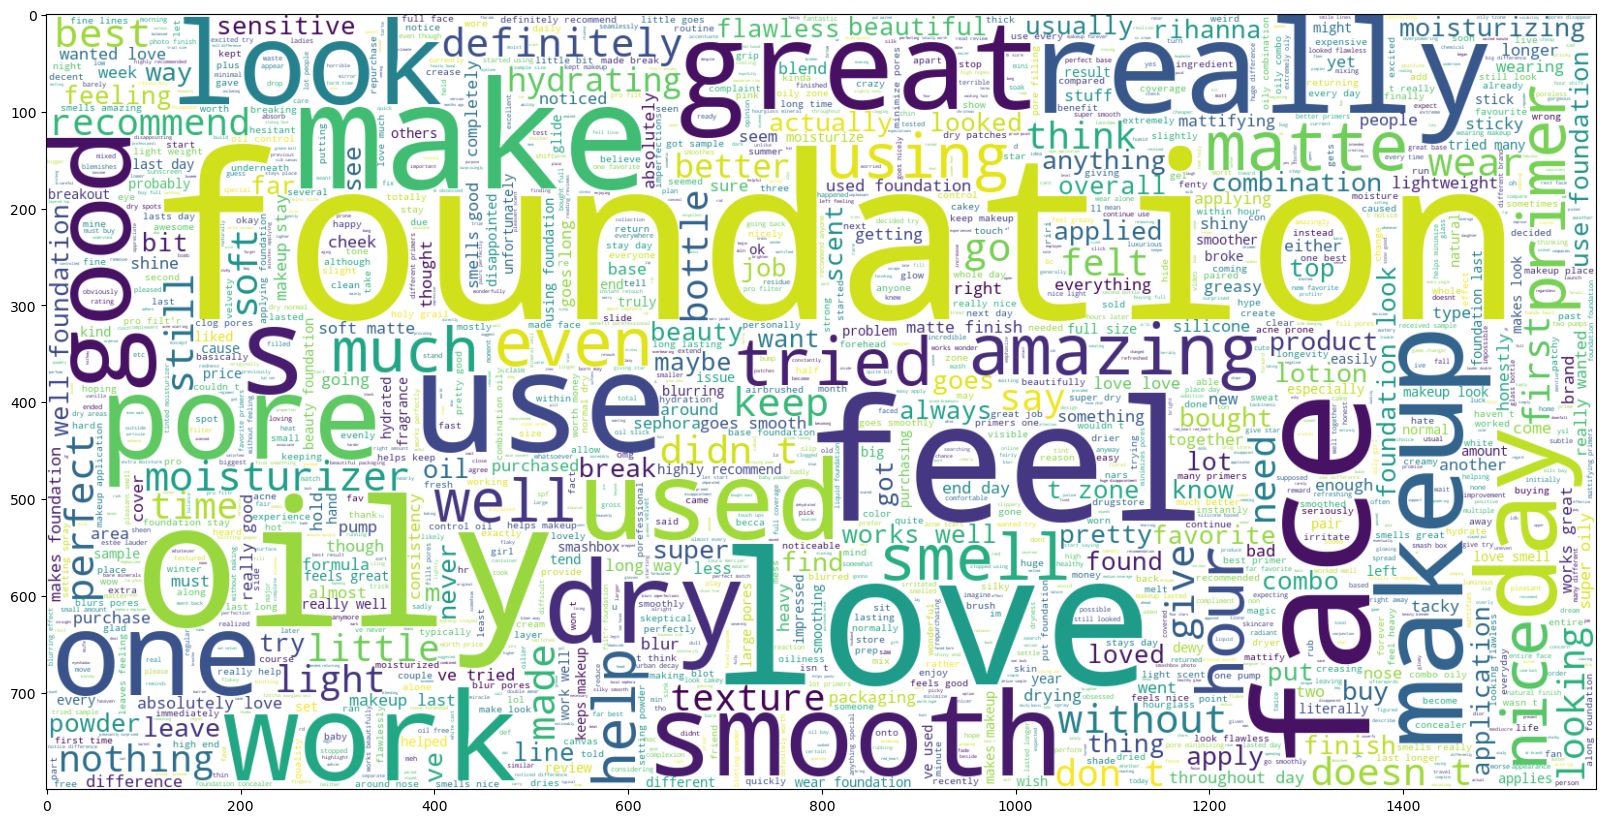

In [176]:
#figure size
plt.figure(figsize = (20,20)) 

#creat word cloud for positive sentiment
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(FB_df[FB_df.sentiment == 'positive'].ReviewText))

#display the word cloud of positive sentiment
plt.imshow(wc , interpolation = 'bilinear')

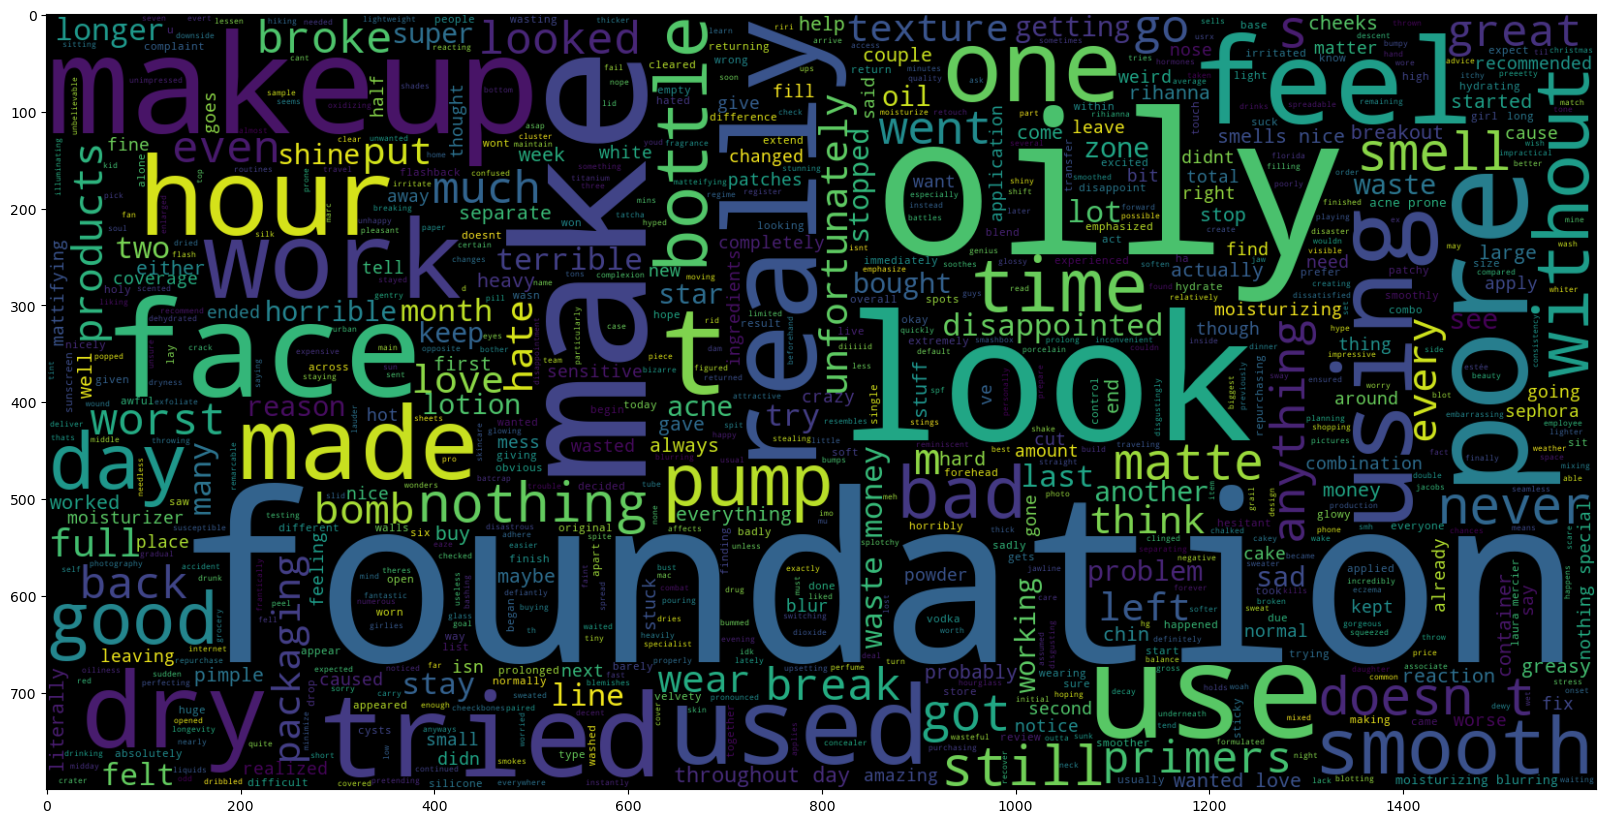

In [177]:
#size
plt.figure(figsize = (20,20)) 

#creat word cloud for negative sentiment
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(FB_df[FB_df.sentiment == 'negative'].ReviewText))

#display the word cloud of negative sentiment
plt.imshow(wc , interpolation = 'bilinear')

## **Content Analysis**

In [178]:
#import necessary models for LDA topic analysis
!pip install pyLDAvis
import unicodedata
import re
import contractions
import string
import gensim
import gensim.corpora as corpora
import spacy
import pyLDAvis
import pyLDAvis.gensim_models

In [179]:
#define a function to split the tweet into words
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '): 
        if word!='':  #if word not in stop_words
           words.append(word) #Add non-empty words to the words list
    return words
    
#store the generated tokens in a new column named 'tokens'
FB_df['tokens']=FB_df.ReviewText.apply(generate_tokens) 
FB_df.head()

,UserNickname,Rating,ReviewText,SubmissionTime,scores,sentiment_score,sentiment,tokens
0,That1Girl87,4,combination like mattifies t-zone also grips m...,2022-06-15 14:18:15+00:00,"{'neg': 0.037, 'neu': 0.541, 'pos': 0.422, 'co...",0.9805,positive,"[combination, like, mattifies, t-zone, also, g..."
1,LilacDinosaur,5,oily large pores since began using foundation ...,2022-06-07 22:12:35+00:00,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.6249,positive,"[oily, large, pores, since, began, using, foun..."
2,sofiacyrus,1,use applying foundation makes foundation patch...,2022-04-06 11:53:39+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"[use, applying, foundation, makes, foundation,..."
3,EJW92,1,worst ever used oily leaves dry patches never ...,2022-03-21 18:36:05+00:00,"{'neg': 0.305, 'neu': 0.519, 'pos': 0.176, 'co...",-0.6049,negative,"[worst, ever, used, oily, leaves, dry, patches..."
4,emleekitten,5,switched low end it’s really big difference i’...,2022-03-15 08:56:14+00:00,"{'neg': 0.147, 'neu': 0.559, 'pos': 0.294, 'co...",0.4767,positive,"[switched, low, end, it’s, really, big, differ..."


In [180]:
#creat a new dataframe in which sentiments are negative
negative_df = FB_df[FB_df['sentiment'] == 'negative'].copy()

#reset index
negative_df = negative_df.reset_index(drop=True)

negative_df.head()

,UserNickname,Rating,ReviewText,SubmissionTime,scores,sentiment_score,sentiment,tokens
0,EJW92,1,worst ever used oily leaves dry patches never ...,2022-03-21 18:36:05+00:00,"{'neg': 0.305, 'neu': 0.519, 'pos': 0.176, 'co...",-0.6049,negative,"[worst, ever, used, oily, leaves, dry, patches..."
1,EbeeBlue,1,oily recommended sephora associate made look o...,2021-11-14 22:48:05+00:00,"{'neg': 0.228, 'neu': 0.614, 'pos': 0.158, 'co...",-0.2023,negative,"[oily, recommended, sephora, associate, made, ..."
2,jmacgirl252,1,really hate texture okay doesn’t spread makes ...,2021-04-09 02:26:51+00:00,"{'neg': 0.213, 'neu': 0.632, 'pos': 0.155, 'co...",-0.4077,negative,"[really, hate, texture, okay, doesn’t, spread,..."
3,china84,2,good bad pump noticed couple uses pump doesnt ...,2020-12-01 16:59:12+00:00,"{'neg': 0.328, 'neu': 0.521, 'pos': 0.151, 'co...",-0.5267,negative,"[good, bad, pump, noticed, couple, uses, pump,..."
4,xodianexo,2,hate bought accident instead pro hydrating hol...,2020-09-29 05:00:41+00:00,"{'neg': 0.333, 'neu': 0.585, 'pos': 0.082, 'co...",-0.8225,negative,"[hate, bought, accident, instead, pro, hydrati..."


In [181]:
#define a function to create a dictionary where words is a list of lists (tokens)
def create_dictionary(words): 
    return corpora.Dictionary(words)

 #pply the function to the 'tokens' column to create the dictionary
id2word=create_dictionary(negative_df['tokens'])

#Print to see how many unique tokens are in the dictionary
print(id2word) 

Dictionary<842 unique tokens: ['(no', 'before)', 'better', 'bummed', 'dry']...>


In [182]:
def create_document_matrix(tokens,id2word): 
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text)) #convert each document into a bag-of-words format 
    return corpus
    
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(negative_df['tokens'],id2word) 

#print the tokens of the first document in the dataframe
print(negative_df['tokens'][0])

#print the bag-of-words representation of the first document
print(corpus[0])

['worst', 'ever', 'used', 'oily', 'leaves', 'dry', 'patches', 'never', 'happened', '(no', 'matter', 'much', 'exfoliate', 'hydrate', 'before)', 'looks', 'better', 'without', 'stuff', 'love', 'gentry', 'products', 'super', 'bummed', 'wasted', 'money']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


In [183]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, #input corpus in bag-of-words format
                                            id2word=id2word,
                                            num_topics=7, #number of topics to extract
                                            random_state=100, #random seed for reproducibility
                                             )

In [184]:
#notebook for displaying the vis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.054575 -0.109076       1        1  22.851000
6     -0.046124  0.105300       2        1  18.653628
2     -0.008723  0.020655       3        1  17.378766
1     -0.124114 -0.008594       4        1  14.123537
4      0.065857  0.091950       5        1  13.594596
5      0.110027 -0.014833       6        1   7.999572
3     -0.051498 -0.085402       7        1   5.398901, topic_info=           Term       Freq      Total Category  logprob  loglift
17         oily  25.000000  25.000000  Default  30.0000  30.0000
64         work   8.000000   8.000000  Default  29.0000  29.0000
55          bad   9.000000   9.000000  Default  28.0000  28.0000
105       hours   9.000000   9.000000  Default  27.0000  27.0000
386        bomb   5.000000   5.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
42       makeup   0.655380  19.730228   Topic7  -5.1879  -0.4857
111        wear   0.614501   4.881443   Topic7  -5.2523   0.8466
88   foundation   0.646386  35.467014   Topic7  -5.2017  -1.0860
11        looks   0.614500   8.060698   Topic7  -5.2523   0.3450
41        makes   0.614670  10.504006   Topic7  -5.2520   0.0805

[477 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
187       7  0.798396         $
0         4  0.683793       (no
753       5  0.673284      (not
188       7  0.788328      (us)
54        6  0.787861    access
...     ...       ...       ...
96        5  0.117295     would
96        7  0.117295     would
442       2  0.693332  wouldn’t
807       1  0.670799     wound
330       2  0.457688     wrong

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 3, 2, 5, 6, 4])